In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Upload the file to Colab
from google.colab import files
uploaded = files.upload()


Saving diva-incstmt.csv to diva-incstmt.csv
Saving divb-incstmt.csv to divb-incstmt.csv


Cleaning the dataset

In [ ]:
# Removing the rows and columns including NaN values
def drop_null_rc(df):
    df_no_col = df.dropna(axis=1, how="all")
    df_no_rc = df_no_col.dropna(axis=0, how="all")
    return df_no_rc


In [ ]:
div_a = pd.read_csv("diva-incstmt.csv", header=5)
div_b = pd.read_csv("divb-incstmt.csv", header=5)


In [ ]:
div_a = drop_null_rc(div_a)
div_b = drop_null_rc(div_b)

In [ ]:
# Displaying the data for "project a" to check
div_a.head(20)

,CODE,Description,Act2019,Act2020,Proj2021
1,SALE,Sales Revenue,43.9,40.3,50.2
2,CGS,Cost of Goods Sold,17.5,18.0,22.6
3,PROF,GROSS PROFIT,26.4,22.3,27.6
5,SGA,"Selling, General, and Admin",2.1,1.8,2.1
6,ADV,Advertising,1.3,1.2,1.5
7,DEP,Depreciation,2.6,2.5,3.2
8,RENT,Rental Expense,2.2,2.2,2.2
9,OTHX,Other Expense,3.1,3.2,3.4
10,EXP,TOTAL EXPENSES,11.3,10.9,12.4
12,EBT,EARNINGS BEFORE TAXES,15.1,11.4,15.2


In [ ]:
# Displaying the data for "project b" to check
div_b.head(20)


,CODE,Description,Act2019,Act2020,Proj2021
1,SALE,Sales Revenue,33.9,30.3,33.9
2,CGS,Cost of Goods Sold,17.5,18.0,14.3
3,PROF,GROSS PROFIT,16.4,12.3,19.7
5,SGA,"Selling, General, and Admin",2.1,1.8,2.1
6,ADV,Advertising,1.3,1.2,4.5
7,DEP,Depreciation,2.1,2.0,3.2
8,RENT,Rental Expense,1.5,1.5,2.2
9,OTHX,Other Expense,3.0,3.0,2.0
10,EXP,TOTAL EXPENSES,10.0,9.5,14.0
12,EBT,EARNINGS BEFORE TAXES,6.4,2.8,5.7


A stacked bar chart of historical and projected sales over time that includes both divisions’ sales. The X-axis being the Year.

In [ ]:
sales_df = pd.DataFrame({
        'Year': ['Actual 2019', 'Actual 2020', 'Projected 2021'],
        'Division 1': div_a.loc[div_a['CODE'] == 'SALE', ['Act2019', 'Act2020', 'Proj2021']].values[0],
        'Division 2': div_b.loc[div_b['CODE'] == 'SALE', ['Act2019', 'Act2020', 'Proj2021']].values[0]
    })


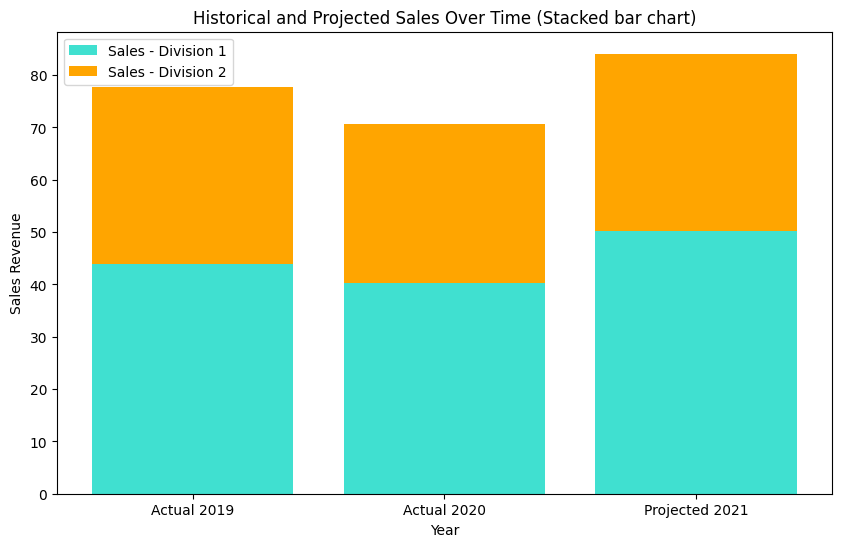

In [ ]:
# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(sales_df['Year'], sales_df['Division 1'], label='Sales - Division 1', color = "turquoise")
plt.bar(sales_df['Year'], sales_df['Division 2'], bottom=sales_df['Division 1'], label='Sales - Division 2', color = "orange")
plt.title('Historical and Projected Sales Over Time (Stacked bar chart)')
plt.xlabel('Year')
plt.ylabel('Sales Revenue')
plt.legend()
plt.show()

A clustered bar chart of sales over time that includes both divisions’ sales. The X-axis being the Year.**

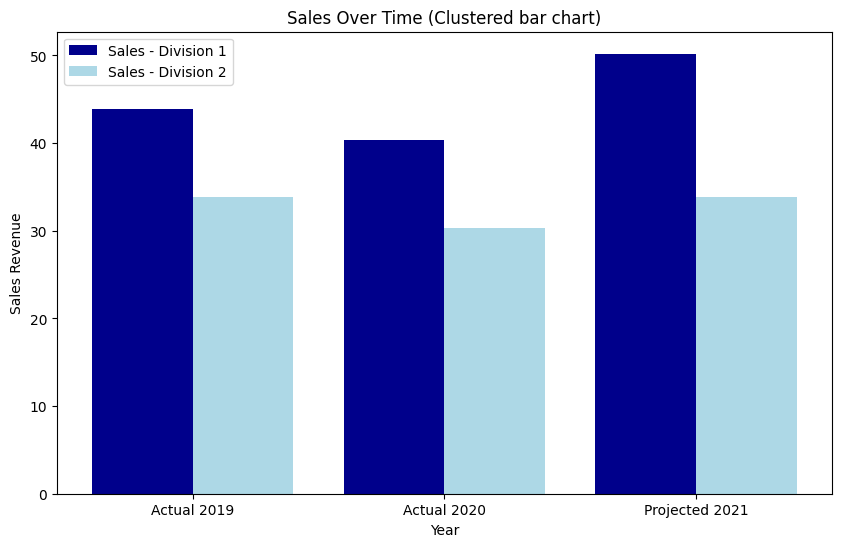

In [ ]:
# Plotting a clustered bar chart
plt.figure(figsize=(10, 6))
width = 0.4
x = range(len(sales_df['Year']))
plt.bar([p - width/2 for p in x], sales_df['Division 1'], width=width, label='Sales - Division 1', color = "darkblue")
plt.bar([p + width/2 for p in x], sales_df['Division 2'], width=width, label='Sales - Division 2', color = "lightblue")
plt.title('Sales Over Time (Clustered bar chart)')
plt.xlabel('Year')
plt.ylabel('Sales Revenue')
plt.xticks(x, sales_df['Year'])
plt.legend()
plt.show()


 Two separate pie charts, one for each division, showing the different kinds of expenses forecasted for 2021.**

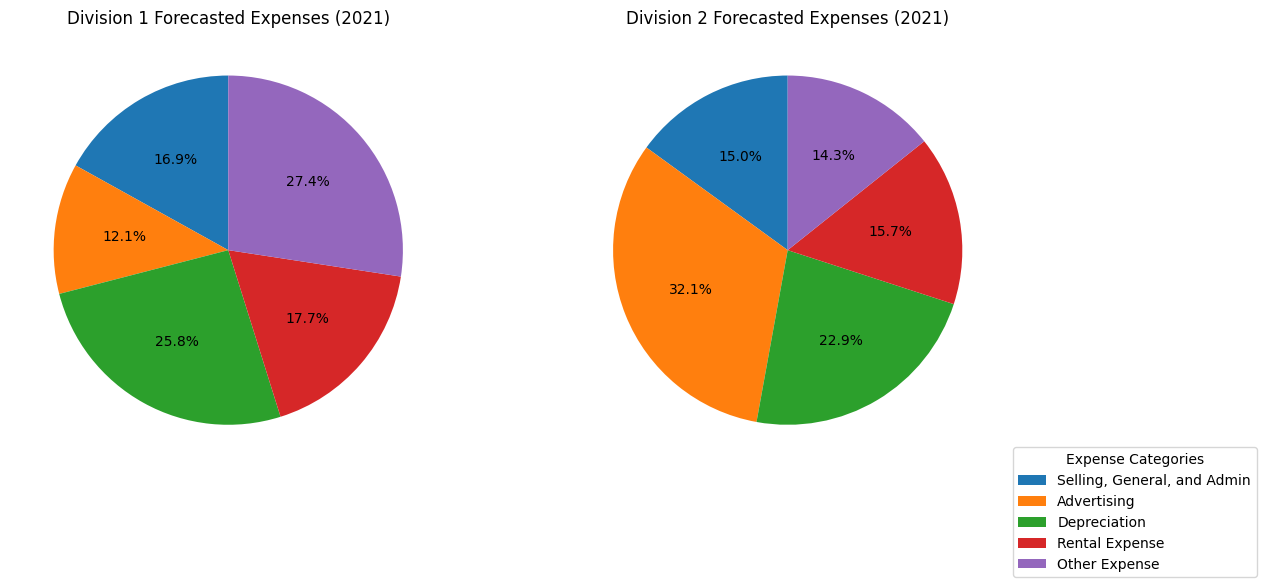

In [ ]:
# Pie Charts for Expenses
# Division 1 Expenses (Proj2021)
expenses1 = div_a[div_a['CODE'].isin(['SGA', 'ADV', 'DEP', 'RENT', 'OTHX'])][['Description', 'Proj2021']]
expenses2 = div_b[div_b['CODE'].isin(['SGA', 'ADV', 'DEP', 'RENT', 'OTHX'])][['Description', 'Proj2021']]

plt.figure(figsize=(14, 6))  # Increased figure size for better layout

# Pie chart for Division 1
plt.subplot(1, 2, 1)
colors1, texts1, autotexts1 = plt.pie(expenses1['Proj2021'], labels=None, autopct='%1.1f%%', startangle=90)
plt.title('Division 1 Forecasted Expenses (2021)')

# Pie chart for Division 2
plt.subplot(1, 2, 2)
colors2, texts2, autotexts2 = plt.pie(expenses2['Proj2021'], labels=None, autopct='%1.1f%%', startangle=90)
plt.title('Division 2 Forecasted Expenses (2021)')

# Create a single legend for both pie charts and moving it a little lower
labels = expenses1['Description'].tolist()
plt.legend(labels, title="Expense Categories", loc="center left", bbox_to_anchor=(1, -0.1))  # Adjust vertical position

# Ensure tight layout without overlap
plt.tight_layout()
plt.show()